In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (18, 10)

In [2]:
n_ranks = 96  # 600
backend = "gtccuda"
data_path = "../data"
csv_file = f"{data_path}/fv3core_{n_ranks}ranks_{backend}_profile.csv"

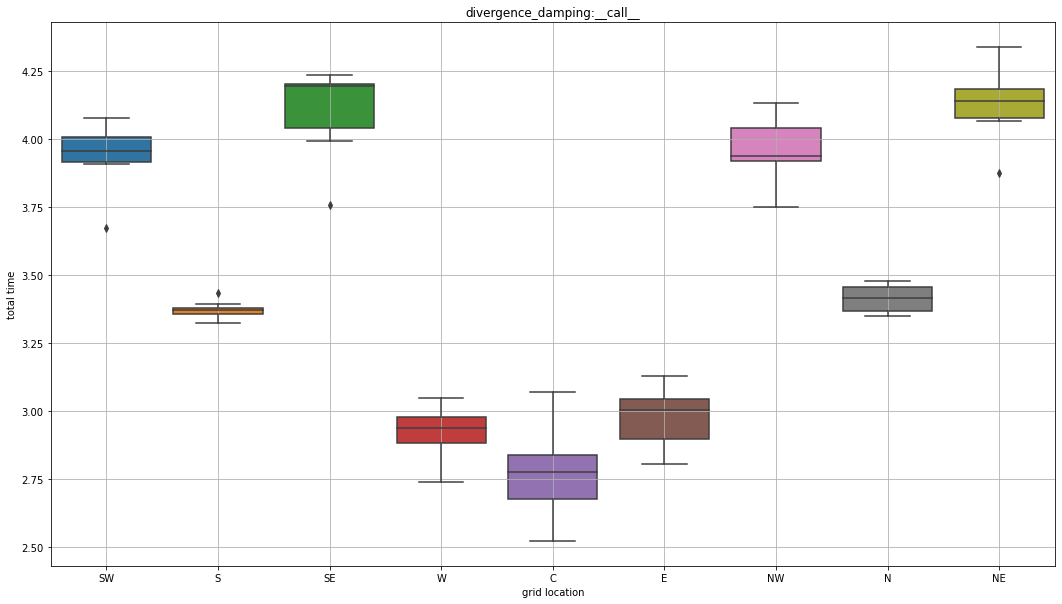

In [51]:
dtypes = {"tile": int, "percall": float}
df = pd.read_csv(csv_file, dtype=dtypes)
df.fillna(value="", inplace=True)

# files = ["fv_dynamics", "decorators", "dyn_core", "c_sw", "updatedzc", "riem_solver_c", "d_sw", "fvtp2d", "delnflux", "xppm", "yppm", "corners", "updatedzd", "riem_solver3", "nh_p_grad", "ray_fast", "del2cubed", "remapping"]
files = ["divergence_damping"]
method_name = "__call__"  # "_dyn"
for file_num, file_name in enumerate(files):
    sub = df
    sub = sub[sub["file_name"] == f"{file_name}.py"]
    sub = sub[sub["method_name"] == method_name]
    # sub
    # plt.figure(figsize=(180, 180))
    sns.boxplot(x="location", y="cumtime", data=sub).set(
        title=f"{file_name}:{method_name}", xlabel='grid location', ylabel='total time'
    )
    plt.grid()  #just add this      
    plt.savefig(f"./images/{file_num}-{file_name}.png")
    plt.show()
    plt.close()
    method_name = "__call__"  # __call__, _dyn, "_device_synchronize"